<a href="https://colab.research.google.com/github/VaysrubNata/VaysrubNata/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22customer_churn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Einstellungen**

In [ ]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# **Data Import**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **EDA - Shape, Typen, Missing Values**

In [ ]:
def dataset_overview(df: pd.DataFrame) -> None:
    print(f"Shape: {df.shape}\n")
    display(df.info())

In [ ]:
dataset_overview(df)

Shape: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

None

 **Target Distribution**

In [ ]:
def target_distribution(df: pd.DataFrame, target: str) -> pd.Series:
    sns.countplot(data = df, x = target)
    plt.title("Verteilung der Zielvariable")
    plt.show()
    return df[target].value_counts(normalize=True)

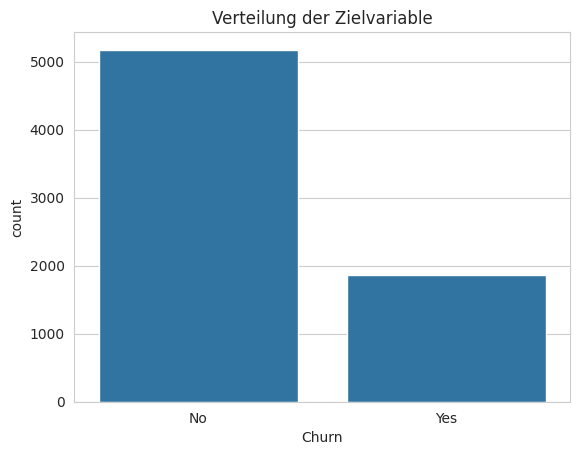

,proportion
Churn,
No,0.73463
Yes,0.26537


In [ ]:
target_distribution(df, target="Churn")

**Numerische und kategoriale Features Trennung**

In [ ]:
def split_feature_types(df: pd.DataFrame, target: str) -> Tuple[List[str], List[str]]:
    features = df.drop(columns=[target])
    numeric_features = features.select_dtypes(include="number").columns.tolist()
    categorical_features = features.select_dtypes(include="object").columns.tolist()

    return numeric_features, categorical_features

In [ ]:
num_features, cat_features = split_feature_types(df, target="Churn")

print(
    f"Numerische – {len(num_features)} Features:\n"
    f"{num_features}\n"
    f"Kategorische – {len(cat_features)} Features:\n"
    f"{cat_features}"
)

Numerische – 3 Features:
['SeniorCitizen', 'tenure', 'MonthlyCharges']
Kategorische – 17 Features:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


**Missing Values**

In [ ]:
def missing_values_report(df: pd.DataFrame) -> pd.DataFrame:
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    return missing.sort_values(ascending=False)

In [ ]:
missing_values_report(df)

,0


**Numeric Features Summary**

In [ ]:
def numeric_summary(df: pd.DataFrame, numeric_features: List[str]) -> pd.DataFrame:
    """Statistische Übersicht numerischer Features."""
    return df[numeric_features].describe().T

In [ ]:
numeric_summary(df, num_features)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Correlations Matrix**

In [ ]:
def plot_correlation(df: pd.DataFrame, numeric_features: List[str]) -> None:
    plt.figure(figsize=(5, 4))
    sns.heatmap(df[numeric_features].corr(), cmap="coolwarm", annot=False)
    plt.title("Korrelationsmatrix")
    plt.show()

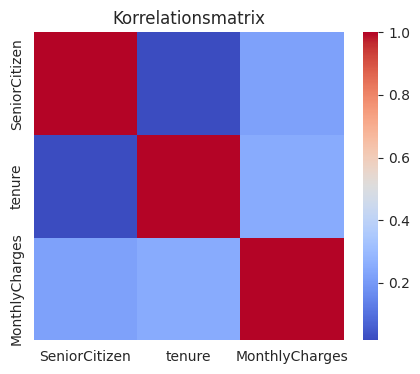

In [ ]:
plot_correlation(df, num_features)

# **Train / Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(
    df: pd.DataFrame,
    target: str,
    test_size: float = 0.2,
    random_state: int = 42
):
    X = df.drop(columns=[target])
    y = df[target].astype("category").cat.codes

    return train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

In [ ]:
X_train, X_test, y_train, y_test = split_data(df, target="Churn")

# **Encoding + Scaling**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
def build_preprocessor(
    numeric_features,
    categorical_features
):

    numeric_transformer = StandardScaler()

    categorical_transformer = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    return preprocessor

In [ ]:
preprocessor = build_preprocessor(num_features, cat_features)

# **Basic Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def build_pipeline(model, preprocessor):
    """Erstellt eine ML-Pipeline."""

    pipeline = Pipeline(
        steps=[
            ("preprocessing", preprocessor),
            ("model", model)
        ]
    )

    return pipeline

# **Base Models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


In [ ]:
models = [
    ("LogReg", LogisticRegression(
        max_iter=100,
        class_weight="balanced",
        random_state=42)),
    ("RandomForest", RandomForestClassifier(
        n_estimators=10,
        class_weight="balanced",
        random_state=42)),
    ("SVM", SVC(
        class_weight="balanced",
        probability=False,
        random_state=42))
]

In [ ]:
from time import time

# **Training and Evaluate**

In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test, preprocessor):
    """Trainiert und evaluiert mehrere Modelle mit Statusmeldungen."""

    results = []

    for name, model in models:
        print(f"🚀 Starte Training: {name}", flush=True)
        start_time = time()

        pipeline = Pipeline(steps=[
            ("preprocessing", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)

        print(f"✅ Training abgeschlossen: {name}", flush=True)

        y_pred = pipeline.predict(X_test)

        elapsed = time() - start_time
        print(f"⏱️ Dauer {name}: {elapsed:.1f} Sekunden", flush=True)

        results.append({
            "Model": name,
            "F1": f1_score(y_test, y_pred),
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "Train_Time_sec": elapsed
        })

        print("-" * 50, flush=True)

    return pd.DataFrame(results)

In [ ]:
results_df = evaluate_models(models, X_train, X_test, y_train, y_test, preprocessor)
results_df

🚀 Starte Training: LogReg
✅ Training abgeschlossen: LogReg
⏱️ Dauer LogReg: 10.7 Sekunden
--------------------------------------------------
🚀 Starte Training: RandomForest
✅ Training abgeschlossen: RandomForest
⏱️ Dauer RandomForest: 2.9 Sekunden
--------------------------------------------------
🚀 Starte Training: SVM
✅ Training abgeschlossen: SVM
⏱️ Dauer SVM: 424.6 Sekunden
--------------------------------------------------


,Model,F1,Accuracy,Precision,Recall,Train_Time_sec
0,LogReg,0.614155,0.760114,0.535857,0.719251,10.693717
1,RandomForest,0.525373,0.774308,0.594595,0.470588,2.864161
2,SVM,0.620321,0.748048,0.516934,0.775401,424.583094


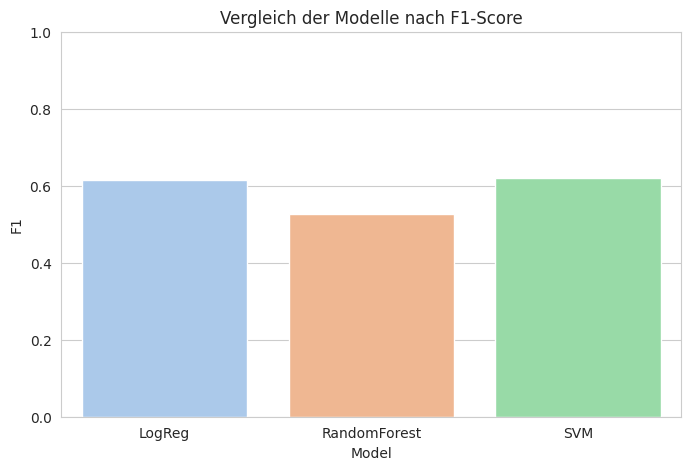

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="F1", hue="Model", palette="pastel")
plt.title("Vergleich der Modelle nach F1-Score")
plt.ylim(0, 1)
plt.show()

# **Neuronales Netz**

In [ ]:
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

print(X_train_nn.shape)

(5634, 10954)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def build_nn(input_dim):
    model = Sequential([
        Dense(64, activation="relu", input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

print(class_weights)

class_weights = dict(zip(classes, class_weights))


[0.68059918 1.88428094]


In [ ]:
model = build_nn(X_train_nn.shape[1])

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

start_time = time()

history = model.fit(
    X_train_nn,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

train_time_nn = time() - start_time
train_time_nn

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6914 - loss: 0.5886 - val_accuracy: 0.7649 - val_loss: 0.4795
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7873 - loss: 0.4585 - val_accuracy: 0.7551 - val_loss: 0.4846
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8172 - loss: 0.3987 - val_accuracy: 0.7196 - val_loss: 0.5357
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9013 - loss: 0.2669 - val_accuracy: 0.7329 - val_loss: 0.5507
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9826 - loss: 0.0955 - val_accuracy: 0.7693 - val_loss: 0.4694
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9972 - loss: 0.0311 - val_accuracy: 0.6823 - val_loss: 0.6569
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9988 - loss: 0.0141 - val_accuracy: 0.6850 - val_loss: 0.6250
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accu

29.378541231155396

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_nn = (model.predict(X_test_nn) > 0.5).astype(int).ravel()

nn_results = {
    "Model": "Neural Network",
    "F1": f1_score(y_test, y_pred_nn),
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn),
    "Recall": recall_score(y_test, y_pred_nn),
    "Train_Time_sec": train_time_nn
}

nn_results

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


{'Model': 'Neural Network',
 'F1': 0.5827814569536424,
 'Accuracy': 0.7764371894960965,
 'Precision': 0.5774278215223098,
 'Recall': 0.5882352941176471,
 'Train_Time_sec': 29.378541231155396}

In [ ]:
results_all = pd.concat(
    [results_df, pd.DataFrame([nn_results])],
    ignore_index=True
)

results_all.sort_values("F1", ascending=False)

,Model,F1,Accuracy,Precision,Recall,Train_Time_sec
2,SVM,0.620321,0.748048,0.516934,0.775401,424.583094
0,LogReg,0.614155,0.760114,0.535857,0.719251,10.693717
3,Neural Network,0.582781,0.776437,0.577428,0.588235,29.378541
1,RandomForest,0.525373,0.774308,0.594595,0.470588,2.864161
